In [1]:
!pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9127 - loss: 0.2897 - val_accuracy: 0.9824 - val_loss: 0.0513
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9870 - loss: 0.0428 - val_accuracy: 0.9888 - val_loss: 0.0352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9911 - val_loss: 0.0297
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9907 - val_loss: 0.0321
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9895 - val_loss: 0.0324


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9873 - loss: 0.0423
Test Accuracy: 98.95%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


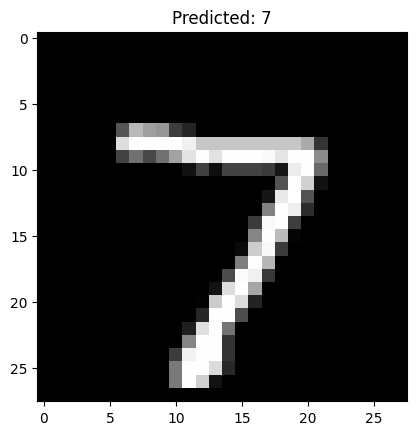

In [6]:
predictions = model.predict(x_test)

plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()


In [7]:
model.save("digit_cnn_model.h5")


In [8]:
import gradio as gr

def predict_digit(image):
    img = cv2.resize(image, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(1, 28, 28, 1) / 255.0
    pred = model.predict(img).argmax()
    return f"Predicted Digit: {pred}"

gr.Interface(fn=predict_digit, inputs="image", outputs="text").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e62cedcb136f9b3ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [16]:
code = """
import cv2
import numpy as np
import gradio as gr
from tensorflow.keras.models import load_model

# Load model
model = load_model("digit_cnn_model.h5")

# Define prediction function
def predict_digit(image):
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(1, 28, 28, 1) / 255.0
    prediction = model.predict(image).argmax()
    return f"Predicted Digit: {prediction}"

# Launch Gradio app
interface = gr.Interface(fn=predict_digit, inputs="image", outputs="text", live=True)
interface.launch()
"""

# Write to a file
with open("app.py", "w") as file:
    file.write(code)

print("✅ app.py saved successfully!")


✅ app.py saved successfully!


In [14]:
readme="""
# 🧠 Handwritten Digit Recognition using CNN & OpenCV

This project demonstrates a deep learning approach to recognizing handwritten digits using a Convolutional Neural Network (CNN). It leverages the popular MNIST dataset and integrates TensorFlow, OpenCV, and Gradio for training, prediction, and deployment.

---

## 📌 Overview

- 🔢 **Dataset**: MNIST (60,000 training, 10,000 testing images)
- 🧠 **Model**: Convolutional Neural Network (CNN)
- 🛠️ **Tech Stack**: Python, TensorFlow, OpenCV, Gradio, Google Colab
- 🌐 **UI**: Gradio Web Interface (Optional)

---

## 🗂️ How It Works

### 1. Load and Preprocess Data
- Images reshaped from (28, 28) to (28, 28, 1)
- Normalized pixel values to [0, 1]
- Labels converted to one-hot encoding

### 2. Build the CNN
```python
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
```
### 3. Train the Model
```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
```
### 4. Predict and Visualize
```python
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
print("Prediction:", np.argmax(model.predict(x_test[0].reshape(1,28,28,1))))
```
##🧪 Optional Enhancements

###🔍 OpenCV Integration

Resize and preprocess images manually

Use OpenCV to draw and capture real-time digits

###🖼️ Gradio App Interface
```python
def predict_digit(image):
    img = cv2.resize(image, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(1, 28, 28, 1) / 255.0
    pred = model.predict(img).argmax()
    return f"Predicted Digit: {pred}"

gr.Interface(fn=predict_digit, inputs="image", outputs="text").launch()
```
### ✅ Results
Achieved over 98% accuracy on test dataset

Successfully deployed real-time digit recognizer using Gradio

### 📁 Files Included

digit_cnn_model.h5: Saved trained model

mnist_digit_classifier.ipynb: Full code in Jupyter/Colab format

app.py: Optional Gradio app

## 🧠 Author
**Syed Musharaf Hossain**
[LinkedIn](https://www.linkedin.com/in/syed-musharaf-hossain) | [GitHub](https://github.com/Syed-221)
"""

with open("README.md", "w") as f:
    f.write(readme)
